<hr>
    <hr>
<b>IRIS FLOWER CLASSIFICATION</b>
    <hr>
<hr>

###### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### DATASET INFORMATION

The data set contains 3 classes of 50 instances each, where each class refers to a 
type of iris plant. One class is linearly separable from the other 2; the latter are
NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

###### ATTRIBUTE INFORMATION

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
        - Iris Setosa
        - Iris Versicolour
        - Iris Virginica

###### READING DATASET

In [2]:
ds = pd.read_csv("Iris.csv")

In [3]:
ds.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ds.shape #shape of dataset

(150, 6)

In [5]:
ds.columns #columns in dataset

Index(['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'],
      dtype='object')

In [6]:
ds.info()  #Dataset Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
ds.describe()  #Dataset Statistical Summary

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
ds.isnull().sum() #checking all columns 'NULL VALUES' 

Id             0
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

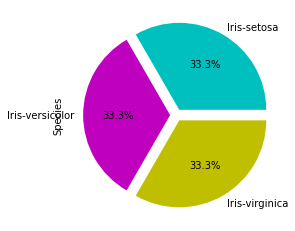

In [9]:
cols = ['c','m','y']
ds["Species"].value_counts().plot(kind ='pie',
                                  labels = ds["Species"].unique(),
                                  colors = cols,
                                  autopct = '%1.1f%%',
                                  explode = [.07,.07,.07])

plt.show()

###### CORRELATION MATRIX

In [10]:
ds.corr('kendall').round(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
Id,1.000,0.525,-0.273,0.645,0.680
SepalLength,0.525,1.000,-0.072,0.718,0.655
SepalWidth,-0.273,-0.072,1.000,-0.182,-0.147
PetalLength,0.645,0.718,-0.182,1.000,0.803
PetalWidth,0.680,0.655,-0.147,0.803,1.000


###### CORRELATION GRAPH THROUGH [HEATMAP]

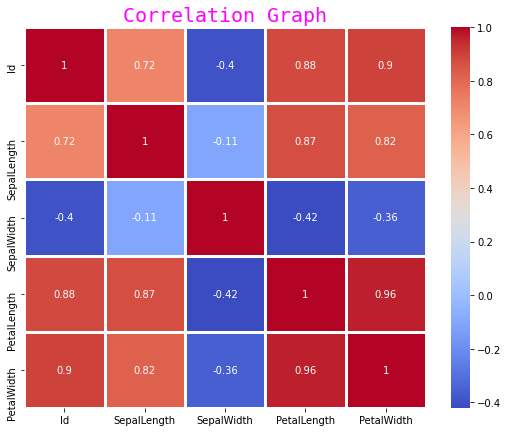

In [11]:
plt.figure(figsize = (9,7))

'''Font for title'''
font = {'family':'monospace',
        'color':'Magenta',
        'size':20}
sns.heatmap(ds.corr(),
            cmap='coolwarm',
            robust=True,
            annot=True,
            linewidths=3)
plt.title("Correlation Graph",fontdict=font)
plt.show()


###### CATEGORICAL LABEL ENCODING

In [12]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
ds['Species'] = Encoder.fit_transform(ds['Species'])

In [13]:
#Encoded values of Species:--
ds['Species'].unique()

array([0, 1, 2])

In [14]:
ds.columns

Index(['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'],
      dtype='object')

###### SPLITTING DATASET

In [15]:
from sklearn.model_selection import train_test_split as tts
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [16]:
X = ds.loc[:,features].values #Feature Matrix definition
y = ds['Species'].values

In [17]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=40,random_state = 42)

In [18]:
print('X-Train shape: ',X_train.shape)
print('X-Test shape : ',X_test.shape)

print('y-Train shape: ',y_train.shape)
print('y-Test shape : ',y_test.shape)

X-Train shape:  (110, 4)
X-Test shape :  (40, 4)
y-Train shape:  (110,)
y-Test shape :  (40,)


###### FEATURE SCALING 

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### (A1)TRAINING THE MODEL [LOGISTIC REGRESSION MODEL]

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

#### i.Predicting values 

In [22]:
print(lr.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0]


#### ii.Accuracy of The model:

In [23]:
print("Accuracy: ",(accuracy_score(y_test,lr.predict(X_test)))*100,"%")

Accuracy:  100.0 %


#### iii.Report:

In [24]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#### iv.Confusion Matrix:

In [25]:
print("Confusion Matrix is:\n",confusion_matrix(y_test,lr.predict(X_test)))

Confusion Matrix is:
 [[17  0  0]
 [ 0 11  0]
 [ 0  0 12]]



### (A2) TRAINING THE MODEL[Decision Tree Classifier]

In [26]:
from sklearn.tree import DecisionTreeClassifier as dt
dt_clf = dt(criterion='entropy',
        splitter='best',
        random_state = 0,
        max_depth = 6)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

#### i.Predicting values:

In [27]:
print(dt_clf.predict(X_test))

[1 0 2 1 1 0 1 1 1 1 1 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0]


#### ii.Accuracy:

In [28]:
print("Accuracy for Decision Tree:",(accuracy_score(y_test,dt_clf.predict(X_test)))*100,"%")

Accuracy for Decision Tree: 95.0 %


#### iii.Report:

In [29]:
print(classification_report(y_test,dt_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      1.00      0.92        11
           2       1.00      0.83      0.91        12

    accuracy                           0.95        40
   macro avg       0.95      0.94      0.94        40
weighted avg       0.96      0.95      0.95        40



#### iv.Confusion Matrix

In [30]:
print("Confusion Matrix for Decision Tree is:\n",confusion_matrix(y_test,dt_clf.predict(X_test)))

Confusion Matrix for Decision Tree is:
 [[17  0  0]
 [ 0 11  0]
 [ 0  2 10]]


### (A3) TRAINING THE MODEL[Naive Bayes]

In [31]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

nb_clf.fit(X_train,y_train)


GaussianNB()

#### i.Predicting values:

In [32]:
nb_clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0])

#### ii.Accuracy

In [33]:
print("Accuracy for NAIVE BAYES: ",accuracy_score(y_test,nb_clf.predict(X_test))*100,"%")

Accuracy for NAIVE BAYES:  100.0 %


#### iii.Report

In [34]:
print(classification_report(y_test,nb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#### iv.Confusion Matrix:

In [35]:
print("Confusion Matrix is: \n",confusion_matrix(y_test,nb_clf.predict(X_test)))

Confusion Matrix is: 
 [[17  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### FINAL RESULTS:

In [36]:
print("Accuracy of Logistic Regression Model: ",accuracy_score(y_test,lr.predict(X_test))*100,"%")
print("Accuracy of Decision Tree Model: ",accuracy_score(y_test,dt_clf.predict(X_test))*100,"%")
print("Accuracy of Naive Bayes Model: ",accuracy_score(y_test,nb_clf.predict(X_test))*100,"%")


Accuracy of Logistic Regression Model:  100.0 %
Accuracy of Decision Tree Model:  95.0 %
Accuracy of Naive Bayes Model:  100.0 %


### CONCLUSION:

1. Thus we implemented a dataset with 150 rows having 3 specific uniformly distributed species
    - Iris Setosa
    - Iris Versicolor
    - Iris Verginica
2. Classification Models we used:
    - Logistic Regression
    - Decision Tree
    - Naive Bayes
    